In [100]:
import pandas as pd

In [101]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(30)

,id,nutrition,ph,action
0,9046,90,7.0,added acid and alkaline solutions
1,51676,100,6.0,pH up solution is added
2,31112,100,8.0,pH down solution is added
3,60182,95,7.0,added acid and alkaline solutions
4,1665,90,7.0,added acid and alkaline solutions
5,56669,92,7.0,added acid and alkaline solutions
6,53882,80,7.0,added acid and alkaline solutions
7,10434,70,7.0,added acid and alkaline solutions
8,27419,100,6.5,pH up solution is added
9,60491,100,6.9,pH up solution is added


In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
enc = LabelEncoder()

In [104]:
data['nutrition'] = enc.fit_transform(data['nutrition'].values)
data['ph'] = enc.fit_transform(data['ph'].values)


In [105]:
data.head()

,id,nutrition,ph,action
0,9046,3,6,added acid and alkaline solutions
1,51676,10,2,pH up solution is added
2,31112,10,10,pH down solution is added
3,60182,5,6,added acid and alkaline solutions
4,1665,3,6,added acid and alkaline solutions


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         29 non-null     int64 
 1   nutrition  29 non-null     int64 
 2   ph         29 non-null     int64 
 3   action     29 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.0+ KB


In [107]:
cls_data = data['action']
cls_data.head()

0    added acid and alkaline solutions
1              pH up solution is added
2            pH down solution is added
3    added acid and alkaline solutions
4    added acid and alkaline solutions
Name: action, dtype: object

In [108]:
atr_data=data.drop(columns='action')
atr_data.head()

,id,nutrition,ph
0,9046,3,6
1,51676,10,2
2,31112,10,10
3,60182,5,6
4,1665,3,6


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [110]:
xtrain, xtest, ytrain, ytest = train_test_split(atr_data, cls_data, test_size=0.2, random_state=500)
tree_data = DecisionTreeClassifier(random_state=500)
tree_data.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=500)

In [111]:
print("Accuracy value on data testing", tree_data.score(xtest, ytest))

Accuracy value on data testing 1.0


In [112]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file="tree_stroke.dot", class_names=["added acid and alkaline solutions", "pH up solution is added", "pH down solution is added", "solutions acid, alkaline & ph down are added", "larutan acid, alkaline & ph up are added"], feature_names=atr_data.columns,
impurity=False, filled=True)

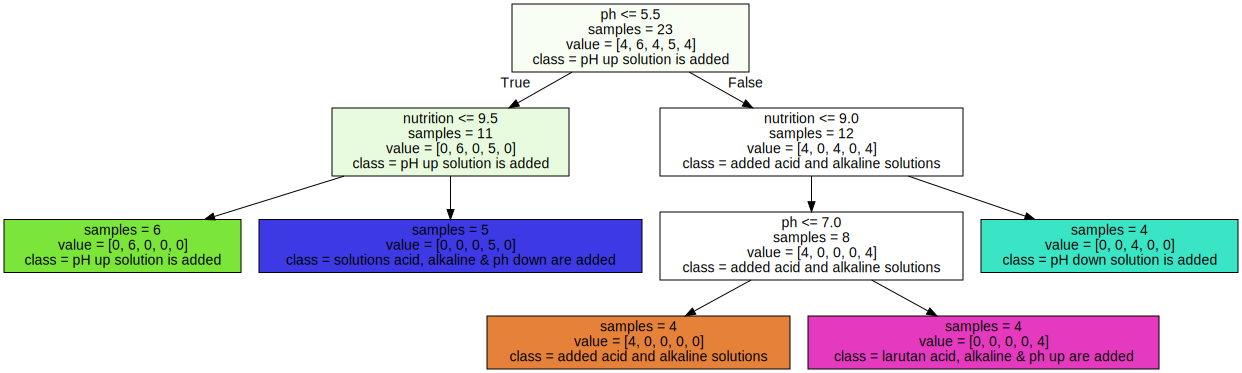

In [113]:
import graphviz
with open("tree_stroke.dot") as fig:
    dot_graph = fig.read()
graphviz.Source(dot_graph)